# Bisection Method

In [1]:
import numpy as np
from time import time
from scipy.stats import norm

In [2]:
def Bisection_vol(vol_a = 1e-4, vol_b = 5, eps = 1e-10):
    S = 100; E = 100; T =1; Mkt = 20; r = 0.05
    vol_mid = 0.5*(vol_a + vol_b)
    n = 0
    t1 = time()
    while abs(vol_mid - vol_b) >= eps:
        d1 = (np.log(S/E) + (r + 0.5 * vol_a**2)*T)/(vol_a * np.sqrt(T))
        d2 = d1 - vol_a * np.sqrt(T)
        price1 = S * norm.cdf(d1) - E * np.exp(-r * T) * norm.cdf(d2)
        d1 = (np.log(S/E) + (r + 0.5 * vol_mid**2) * T)/(vol_mid * np.sqrt(T))
        d2 = d1 - vol_mid * np.sqrt(T)
        price2 = S * norm.cdf(d1) - E * np.exp(-r * T) * norm.cdf(d2)

        f_a = price1 - Mkt; f_mid = price2 - Mkt
        ftn = f_a * f_mid

        if ftn <= 0:
            vol_b = vol_mid
        else:
            vol_a = vol_mid
        vol_mid = 0.5*(vol_a + vol_b)
        n += 1
    t2 = time()
    elapsed = t2 - t1
    Bisection_vol = round(vol_mid,6)
    return [Bisection_vol, n, round(elapsed,10)]
Bisection_vol()

[0.45234, 35, 0.0249993801]

# Newton-Raphson Method

### Exercise

In [3]:
def Newton_Root():
    def f(x):
        return np.exp(2*x) - np.exp(x) - 2
    def f1(x):
        return 2 * np.exp(2*x) - np.exp(x)
    a = np.random.uniform()
    eps = 1e-10
    n = 0
    while abs(f(a)) >= eps:
        a -= f(a)/f1(a)
        n += 1
    return [round(a,6),n]

In [4]:
Newton_Root()

[0.693147, 6]

### Newton Implied Volatility

In [10]:
np.random.seed(123)
def NR_vol(vol = np.random.uniform(), eps = 1e-10):
    S = 100; E = 100; T =1; Mkt = 20; r = 0.05
    n = 0
    d1 = (np.log(S/E) + (r + 0.5 * vol ** 2) * T)/(vol * np.sqrt(T))
    d2 = d1 - vol * np.sqrt(T)
    price = S * norm.cdf(d1) - E * np.exp(-r * T) * norm.cdf(d2)
    diff = price - Mkt
    vega = S * norm.pdf(d1) * np.sqrt(T)
    t1 = time()
    while abs(diff) >= eps:
        vol -= diff/vega
        d1 = (np.log(S/E) + (r + 0.5 * vol ** 2) * T)/(vol * np.sqrt(T))
        d2 = d1 - vol * np.sqrt(T)
        price = S * norm.cdf(d1) - E * np.exp(-r * T) * norm.cdf(d2)
        diff = price - Mkt
        n += 1
    t2 = time()
    elapsed = t2 - t1
    NR_vol = round(vol,6)
    return [NR_vol, n, round(elapsed,10)]
NR_vol()

[0.45234, 8, 0.0029993057]

In [11]:
print(Bisection_vol(),NR_vol())

[0.45234, 35, 0.0460321903] [0.45234, 8, 0.0060043335]


### Conclusion : Newton Raphson is much more faster. 

In [12]:
t_list = []
for i in range(1000):
    t = Bisection_vol()[2]/NR_vol()[2]
    t_list.append(t)
t_list

[7.166256354681164,
 9.65326342227992,
 10.997260137775013,
 7.332645040716023,
 10.497796179311363,
 8.665157962803178,
 7.330104846945197,
 11.005959361044034,
 8.251638198530204,
 9.674401912519945,
 8.002859810254726,
 7.666322487051381,
 10.995355546311469,
 7.329576038705322,
 12.012035383492686,
 7.367749025543019,
 6.500297806575922,
 13.999642422474073,
 11.00095277398622,
 11.500536344196995,
 7.669526465814774,
 10.504528194024747,
 7.661825385731997,
 6.401382257070531,
 10.665872599731784,
 7.328941000180017,
 7.332883249735911,
 7.667302113778001,
 10.499344699339103,
 11.002144982676255,
 11.010611784279046,
 7.66809633661137,
 11.008339039665303,
 11.993328288576103,
 7.330871802434362,
 11.003336600845447,
 10.499582917816623,
 12.005481483562122,
 7.332724443722652,
 7.33145389569669,
 7.334842407795016,
 7.295567564844859,
 7.327642251618801,
 12.497677020110673,
 7.66809633661137,
 7.334842407795016,
 11.517418446381138,
 7.334842407795016,
 7.332062852880708,
 9.99

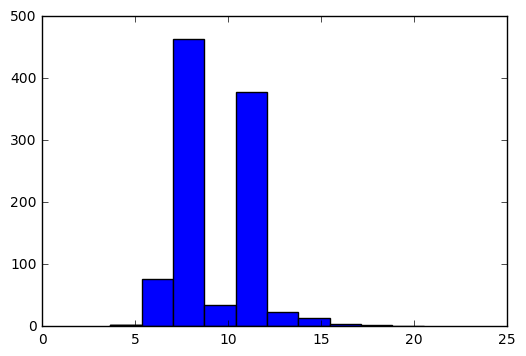

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
% matplotlib inline
plt.hist(t_list)
plt.show()

In [17]:
pd.DataFrame(t_list).describe()

,0
count,1000.000000
mean,9.154237
std,2.134528
min,3.666852
25%,7.334604
50%,7.999603
75%,11.000715
max,20.506077
